## About
Fashion MNIST classification using Logistic Regression in PyTorch.

In [24]:
# importing librarires
import torch
import torchvision
# importing MNIST dataset
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
%matplotlib inline
from torch.utils.data import random_split,DataLoader
import torch.nn as nn
import torch.nn.functional as F

Dataset Link : https://www.kaggle.com/datasets/zalando-research/fashionmnist
Labels

```Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
```

In [3]:
# downloading the training and testing dataset
train_dataset = FashionMNIST(root='data/', download=True, train=True)
test_dataset = FashionMNIST(root='data/',download=True,train=False)


In [4]:
#finding number of samples in training and testing dataset
print("The details about training samples are {}".format(train_dataset))
print("The details about testing samples are {} ".format(test_dataset))

The details about training samples are Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
The details about testing samples are Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test 


## Visualising data samples - Random image


In [5]:
train_dataset[5]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F017EEE3C10>, 2)

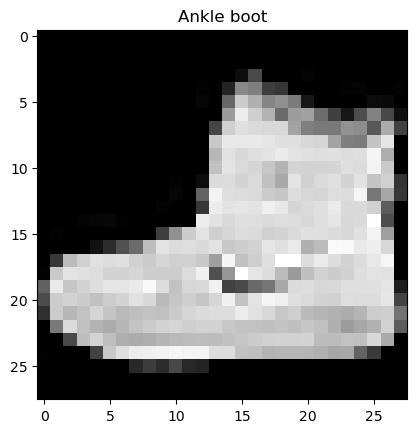

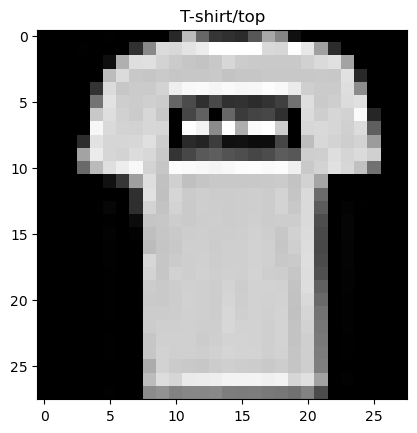

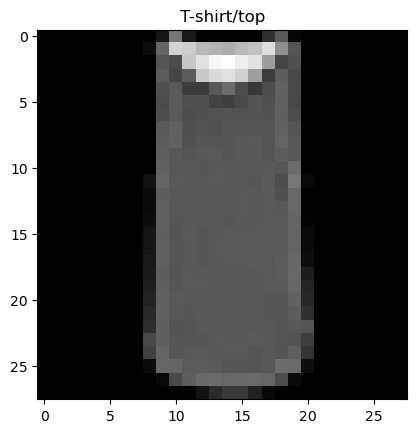

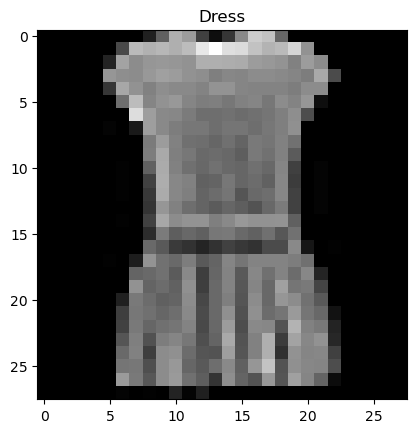

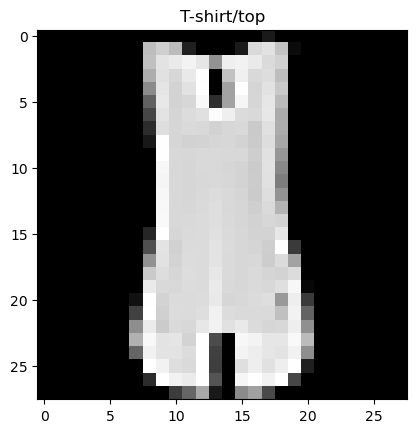

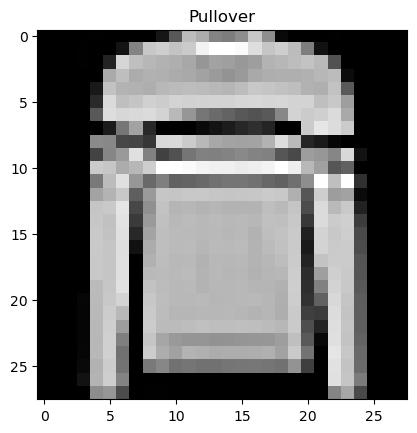

In [6]:
dataset_labels_dict = {'0':'T-shirt/top','1':'Trouser',
'2' :'Pullover',
'3': 'Dress',
'4' :'Coat',
'5' :'Sandal',
'6' :'Shirt',
'7': 'Sneaker',
'8': 'Bag',
'9' :'Ankle boot'}
for i in range(6):
    image_data, label = train_dataset[i]
    plt.imshow(image_data, cmap='gray')
    plt.title(dataset_labels_dict[str(label)])
    plt.show()

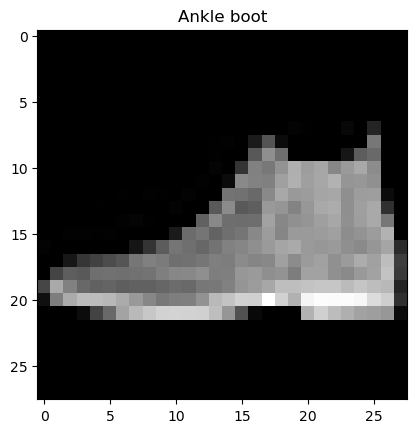

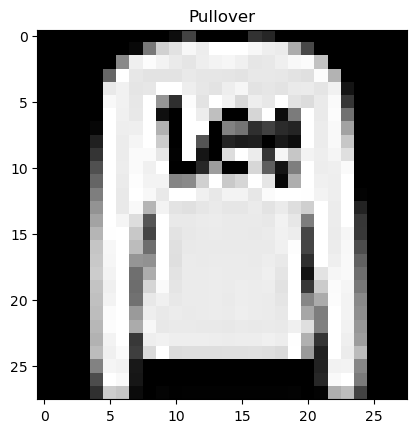

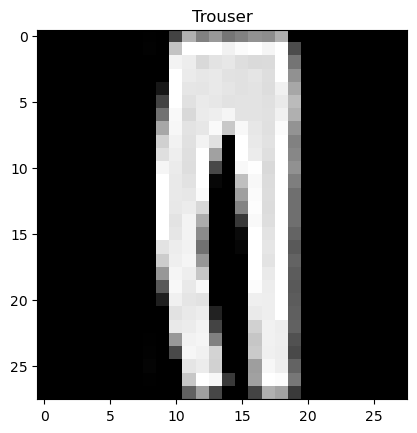

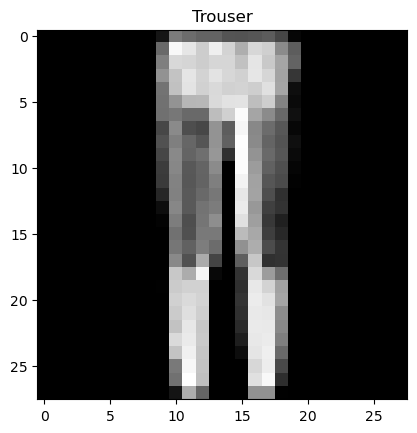

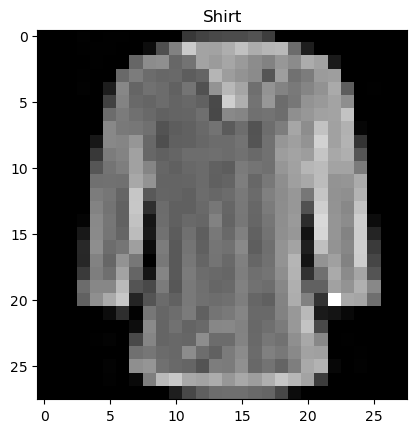

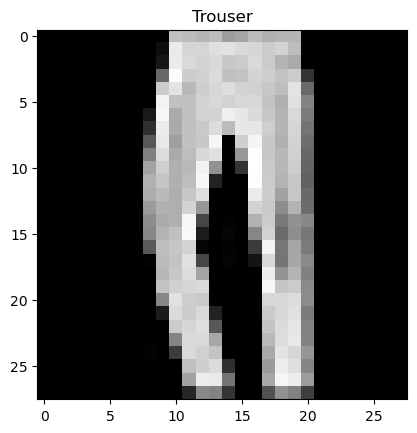

In [7]:
# similarly, visualising test dataset
for i in range(6):
    image_data, label = test_dataset[i]
    plt.imshow(image_data, cmap='gray')
    plt.title(dataset_labels_dict[str(label)])
    plt.show()

In [8]:
# since, pytorch doesn't work on pil images, so we have to convert these pil images to tensors to make it interpretable
# reloading dataset with transforms 
# downloading the training and testing dataset
train_dataset = FashionMNIST(root='data/', download=True, train=True,transform=transforms.ToTensor())
test_dataset = FashionMNIST(root='data/',download=True,train=False,transform=transforms.ToTensor())


In [9]:
# let's the tensor
tensor, label = train_dataset[0]

In [10]:
tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [11]:
tensor.shape

torch.Size([1, 28, 28])

In [12]:
# splitting the train dataset into train, val split
train_set, val_set = random_split(train_dataset,[45000,15000])
print("Length of training samples is {}".format(len(train_set)))
print("Length of testing samples is {}".format(len(val_set)))

Length of training samples is 45000
Length of testing samples is 15000


In [13]:
# setting device
device = torch.device("cpu") #torch.device("cuda:0") 


In [14]:
#creating dataloaders i.e train and val
batch_size =256
train_loader = DataLoader(train_set,batch_size,shuffle=True)
val_loader = DataLoader(val_set, batch_size,shuffle=True)

In [15]:
input_size=784 # 28*28
num_classes = 10

In [16]:
# let's create a custom model which extends nn.module class from PyTorch
class FashionMNIST(nn.Module):
    def __init__(self) -> None:
        super().__init__() # constructor of super class i.e class which we are extending
        self.linear = nn.Linear(input_size,num_classes)
    
    def forward(self,input_tensor) -> tensor:
        input_tensor = input_tensor.reshape(-1,input_size)
        output_tensor = self.linear(input_tensor)
        return output_tensor



In [17]:
model = FashionMNIST()

In [18]:
# fetching weights and biases
print("Shape of weights matrix is {}".format(model.linear.weight.shape))
print("Shape of bias matrix is {}".format(model.linear.bias.shape))


Shape of weights matrix is torch.Size([10, 784])
Shape of bias matrix is torch.Size([10])


##### Next
Passing the images to the model through the train_loader and seeing how output can be interpreted

In [25]:
for images,labels in train_loader:
    logits = model(images)
    break

print('Output\'s first few rows are', outputs[:4].data)

Output's first few rows are tensor([[-0.0901,  0.3318, -0.3329,  0.5321, -0.0413, -0.2536, -0.0549, -0.1103,
          0.6159,  0.0804],
        [ 0.0858,  0.5320, -0.0190,  0.3995, -0.1393, -0.0141,  0.0623, -0.1206,
          0.4372, -0.0019],
        [-0.4308,  0.4294, -0.2895,  0.1135, -0.0137, -0.0606,  0.1168, -0.0059,
          0.0048,  0.0271],
        [ 0.1032,  0.5125, -0.3855,  0.1783,  0.0481, -0.1581,  0.3401, -0.6144,
          0.4178, -0.2852]])


In [27]:
logits.shape

torch.Size([256, 10])

In [28]:
logits[0].data

tensor([-0.1230,  0.2443, -0.0095,  0.2072,  0.0313, -0.0276,  0.2376, -0.0404,
         0.3869,  0.0078])

#### Interpretation -
This clearly can't be output probability for 10 classes. These are often known as logits which needs to be passed through an activation function, Here softmax(e^z/summation(e^x) for x=1 to len(classes))

In [31]:
# getting the probability
probability = F.softmax(logits, dim=1)

In [32]:
# let's now have a look at the probabiltiies
print('Probability\'s first few rows are', probability[:4].data)

Probability's first few rows are tensor([[0.0797, 0.1151, 0.0893, 0.1109, 0.0930, 0.0877, 0.1143, 0.0866, 0.1327,
         0.0908],
        [0.1139, 0.1263, 0.0901, 0.0887, 0.1022, 0.0962, 0.0995, 0.0717, 0.1383,
         0.0731],
        [0.0993, 0.1161, 0.0813, 0.1037, 0.0906, 0.0847, 0.1124, 0.0881, 0.1247,
         0.0992],
        [0.0856, 0.1452, 0.0918, 0.1001, 0.0908, 0.0870, 0.1007, 0.0940, 0.1078,
         0.0970]])


# Remark
Whichever probability for the index will be maximum shall be the prediction.

In [34]:
max_probability, pred_label = torch.max(probability,dim=1)
print("Prediction label is {}".format(pred_label))
print("Maximum probability is {}".format(max_probability))

Prediction label is tensor([8, 8, 8, 1, 1, 8, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 8, 1,
        8, 8, 8, 1, 1, 1, 8, 8, 1, 8, 1, 1, 1, 8, 8, 1, 1, 1, 1, 6, 1, 8, 1, 1,
        8, 8, 1, 1, 6, 3, 1, 1, 1, 1, 1, 1, 1, 8, 8, 1, 8, 1, 8, 1, 8, 8, 8, 1,
        1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 8, 8, 8, 1, 8, 9, 1, 1, 1, 8, 8, 6, 1, 8,
        3, 1, 1, 1, 8, 1, 0, 8, 1, 1, 1, 1, 1, 8, 8, 8, 8, 1, 8, 1, 8, 8, 8, 8,
        1, 1, 8, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 8, 8,
        3, 1, 8, 1, 1, 8, 8, 1, 1, 1, 1, 8, 1, 1, 8, 8, 1, 8, 1, 1, 8, 8, 8, 1,
        1, 1, 3, 8, 8, 8, 8, 1, 1, 8, 8, 8, 8, 1, 1, 8, 1, 1, 3, 3, 1, 1, 8, 8,
        8, 8, 1, 8, 8, 1, 1, 8, 1, 1, 8, 8, 1, 1, 8, 1, 1, 1, 8, 8, 1, 8, 8, 1,
        1, 1, 1, 8, 6, 1, 1, 6, 1, 1, 1, 1, 8, 1, 1, 6, 1, 1, 8, 1, 1, 8, 1, 1,
        8, 1, 8, 1, 8, 1, 1, 8, 1, 8, 1, 8, 1, 8, 1, 1])
Maximum probability is tensor([0.1327, 0.1383, 0.1247, 0.1452, 0.1338, 0.1336, 0.1814, 0.1473, 0.2273,
        0.1847, 0.14

In [39]:
print("Max probability that {}st image's label is {} :: {}".format(1,pred_label[1],max_probability[1]))

Max probability that 1st image's label is 8 :: 0.13825640082359314


In [40]:
# let's see the accuracy
def accuracy(outputs, labels):
    _,preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [50]:
accuracy(logits,labels)

tensor(0.1680)

These are just the prediction with randomly initialised weight and hence accuracy is 16%. For accurate predictions, We have to train the model.

# Next Step
Let's have a look at the loss function which is cross_entropy

In [43]:
loss_function = F.cross_entropy
# it is to remembered that cross entropy implements softmax inside so we can directly serve it the logits

loss = loss_function(logits,labels)
print(loss)

tensor(2.2595, grad_fn=<NllLossBackward0>)


#### Training Phase

#### General boilerplate code theme is as follows

```
for epoch in range(epochs):
    #training
    for batch in train_dataloader:
    # Step 1: Generate predictions or logits from the model
    # Step 2: Calculate loss.
    # Step 3 : Compute gradients
    # Step 4 : Update the weights
    # Step 5 : Reset the gradients
    # Step 6 : Calculate metrics (F1, PR, Accuracy etc)

    #validation
    for batch in val_dataloader
    # step 1: generate predictions or logits
    # step 2: calculate loss
    # step 3 : calculate metrics (F1, PR, Accuracy etc)

#calculate average loss of train and validation 

#Display the metrics

```

In [144]:
# defining the evaluate function
def evaluate(model,validation_dataloader):
    outputs = [model.validation_step(batch) for batch in validation_dataloader]
    return model.validation_epoch_end(outputs)

In [92]:
# creating the train val method
def train_val_fit(epochs, learning_rate,model, train_dataloader,val_dataloader, optimizer = torch.optim.Adam):
    optimizer = optimizer(model.parameters(), learning_rate)
    model_train_history = []

    for epoch in range(epochs):
        #training phase
        batch_loss = []
        for batch in train_dataloader:
            loss = model.training_step(batch)
            batch_loss.append(loss)
            loss.backward()
            optimizer.step()
            #resetting params ie grads.
            optimizer.zero_grad()
        print("Training loss over the batch: {}".format(sum(batch_loss)/len(batch_loss))) # using item to extract value out of tensor

        #validation phase
        result = evaluate(model,val_dataloader)
        model.epoch_end(epoch,result)
        model_train_history.append(result)
    
    return model_train_history

In [98]:
# let's extend our model class with methods like training_step, validation_step, epoch_end
# let's create a custom model which extends nn.module class from PyTorch
class FashionMNIST(nn.Module):
    def __init__(self) -> None:
        super().__init__() # constructor of super class i.e class which we are extending
        self.linear = nn.Linear(input_size,num_classes)
    
    def forward(self,input_tensor) -> tensor:
        input_tensor = input_tensor.reshape(-1,input_size)
        output_tensor = self.linear(input_tensor)
        return output_tensor

    def training_step(self,batch) -> tensor:
        images,labels = batch
        logits  = self(images) # self -> model
        loss = F.cross_entropy(logits,labels)# cross entropy has softmax implemented
        return loss

    def validation_step(self,batch) -> dict:
        images, labels = batch
        logits = self(images)
        loss = F.cross_entropy(logits,labels) # cross entropy has softmax implemented
        acc = accuracy(logits,labels)
        return {'val_loss':loss, 'val_acc':acc}
        
    def validation_epoch_end(self,outputs) -> dict:
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() 
        batch_accuracy = [x['val_acc'] for x in outputs]
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {'val_loss': epoch_loss.item(), 'val_accuracy':epoch_accuracy.item()}

    def epoch_end(self,epoch,result) -> None:
        print("Epoch [{}], val_loss :{:4f}, val_acc: {:4f}".format(epoch+1,result['val_loss'], result['val_accuracy']))

In [99]:
model = FashionMNIST()

In [100]:
history = train_val_fit(10,0.01, model, train_loader,val_loader)

Training loss over the batch: 0.5882554650306702
Epoch [1], val_loss :0.511458, val_acc: 0.822863
Training loss over the batch: 0.4619418978691101
Epoch [2], val_loss :0.448164, val_acc: 0.843339
Training loss over the batch: 0.4393644332885742
Epoch [3], val_loss :0.437128, val_acc: 0.848646
Training loss over the batch: 0.43307000398635864
Epoch [4], val_loss :0.439472, val_acc: 0.846750
Training loss over the batch: 0.4157191216945648
Epoch [5], val_loss :0.443188, val_acc: 0.846032
Training loss over the batch: 0.40835830569267273
Epoch [6], val_loss :0.457468, val_acc: 0.844325
Training loss over the batch: 0.4136638939380646
Epoch [7], val_loss :0.430115, val_acc: 0.849921
Training loss over the batch: 0.4031858742237091
Epoch [8], val_loss :0.441820, val_acc: 0.845513
Training loss over the batch: 0.39970874786376953
Epoch [9], val_loss :0.449632, val_acc: 0.847095
Training loss over the batch: 0.40126359462738037
Epoch [10], val_loss :0.448674, val_acc: 0.847754


Text(0.5, 1.0, 'Accuracy plot')

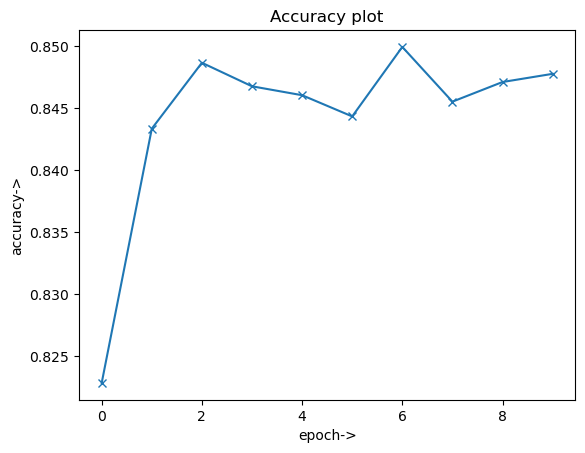

In [106]:
# plotting the curves
accuracy = [result['val_accuracy'] for result in history]
plt.plot(accuracy,'-x')
plt.xlabel('epoch->')
plt.ylabel('accuracy->')
plt.title('Accuracy plot')

Text(0.5, 1.0, 'Accuracy plot')

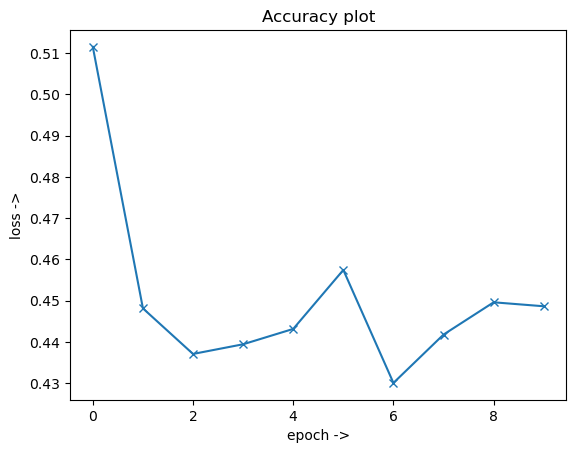

In [107]:
# plotting the curves
loss = [result['val_loss'] for result in history]
plt.plot(loss,'-x')
plt.xlabel('epoch ->')
plt.ylabel('loss ->')
plt.title('Accuracy plot')

## Testing Phase

In [134]:
# predicting on test_image
def predict(image,model):
    #img_data = image.reshape(-1,784)
    img_data = image.unsqueeze(0)
    #print(img_data.shape)
    probs = model(img_data)
    _, preds = torch.max(probs,dim=1)
    #print(preds[0].item)
    return preds[0].item()
    #return "Predicted Label is".format(dataset_labels_dict[str(preds[0].item())])


In [135]:
img,label = test_dataset[0]
dataset_labels_dict[str(predict(img,model))]

'Ankle boot'

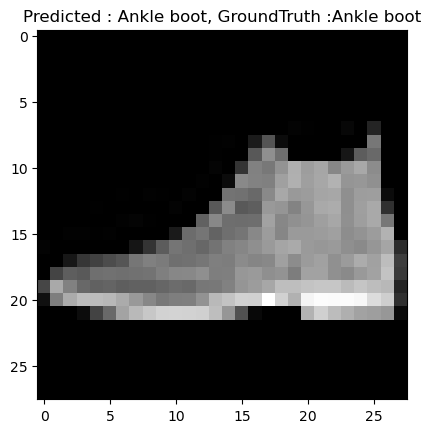

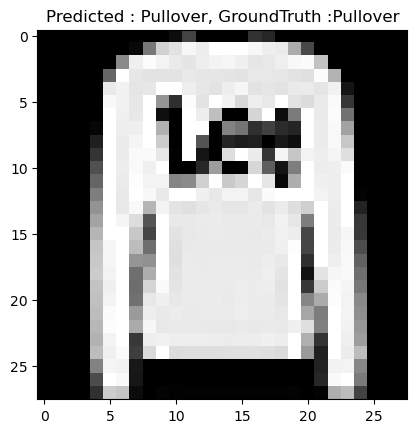

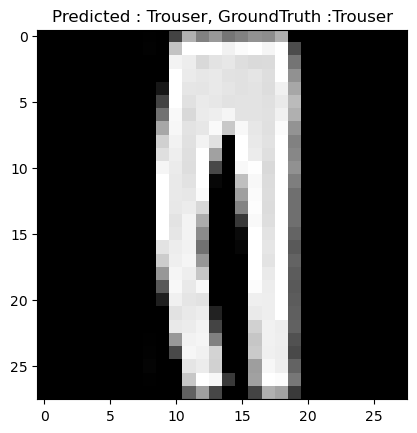

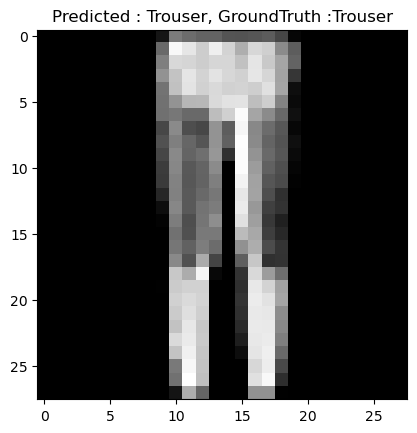

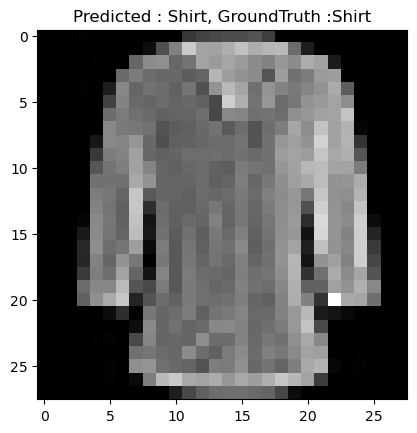

In [141]:
for i in range(5):
    img,label = test_dataset[i]
    plt.imshow(img[0],cmap='gray')
    plt.title("Predicted : {}, GroundTruth :{}".format(dataset_labels_dict[str(predict(img,model))],dataset_labels_dict[str(label)]))
    plt.show()

In [146]:
# saving the model by saving state_dict
torch.save(model.state_dict(), 'mnist-fashion_model.pth')

In [149]:
# to view the weights and bias after training, refer the state_dict
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-2.0396,  1.1140,  1.0898,  ...,  0.0579, -0.7473, -0.1633],
                      [-0.7033,  0.1800, -0.7977,  ..., -0.4693, -0.2788, -1.5861],
                      [-0.8061,  0.6679,  0.6744,  ...,  0.5636, -0.2116,  0.3456],
                      ...,
                      [-0.0109, -0.7506, -0.6950,  ...,  0.0386,  0.3663, -1.8685],
                      [-0.6209, -1.3547, -2.0670,  ..., -0.8025, -0.8571,  0.1564],
                      [-0.0319,  0.0699, -0.3235,  ...,  0.3981,  0.7987,  0.0138]])),
             ('linear.bias',
              tensor([ 0.5786, -1.4177, -0.0350,  0.7265, -1.3839,  2.8803,  0.6121,  0.0659,
                      -0.6335, -2.1317]))])

In [150]:
#loading model
models2 = FashionMNIST()
models2.load_state_dict(torch.load('mnist-fashion_model.pth'))

<All keys matched successfully>

### End Remarks
Linear model's accuracy may not be that high, so one can
1. Train a non-linear model.
2. collect more data or use lower learning rate.